# **Exploratory Data Analysis:**

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,CreationDate,AvgArrivalDate,TotalRevenue,TotalBookings,SpecialRequests,FirstArrivalDate,LastArrivalDate,Country
0,1,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-08-03,2018-09-17,476.3,4,0,2016-01-22,2018-08-02,Portugal
1,3,31.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-01-01,0.0,0,0,-1,-1,Germany
2,4,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-04-03,300.0,1,0,2015-12-27,2015-12-27,France
3,5,51.0,1095,0,0.0,0.0,0,0,0,0,0,-1,-1,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-01-01,0.0,0,0,-1,-1,France
4,6,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-02-28,254.0,1,0,2015-12-30,2015-12-30,Japan


In [122]:
data.shape

(79777, 36)

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79777 entries, 0 to 79776
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    79777 non-null  int64  
 1   Age                   79777 non-null  float64
 2   DaysSinceCreation     79777 non-null  int64  
 3   AverageLeadTime       79777 non-null  int64  
 4   LodgingRevenue        79777 non-null  float64
 5   OtherRevenue          79777 non-null  float64
 6   BookingsCanceled      79777 non-null  int64  
 7   BookingsNoShowed      79777 non-null  int64  
 8   BookingsCheckedIn     79777 non-null  int64  
 9   PersonsNights         79777 non-null  int64  
 10  RoomNights            79777 non-null  int64  
 11  DaysSinceLastStay     79777 non-null  int64  
 12  DaysSinceFirstStay    79777 non-null  int64  
 13  DistributionChannel   79777 non-null  object 
 14  MarketSegment         79777 non-null  object 
 15  SRHighFloor        

## **LodgingRevenue, OtherRevenue & Total Revenue:**

- In this section we are going to look at the `TotalRevenue` column for in depth analysis and to extract impactful insights.

<Axes: xlabel='TotalRevenue', ylabel='Density'>

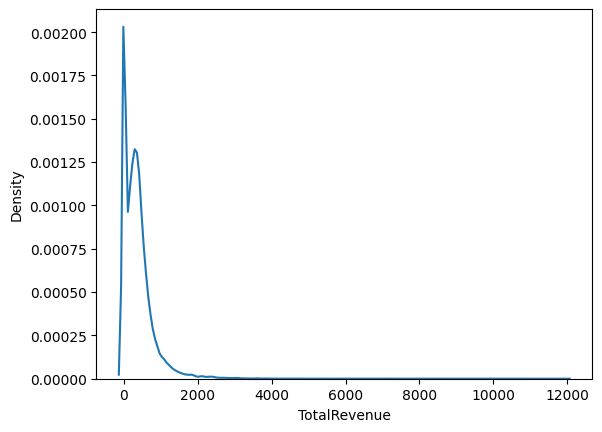

In [124]:
sns.kdeplot(data.TotalRevenue)

The density plot of TotalRevenue reveals a highly right-skewed distribution, where most customers generate relatively low revenue, with a long tail extending toward higher revenue values. This indicates that a small segment of customers contributes disproportionately high revenue, while the majority bring in modest amounts.




In [125]:
data.TotalRevenue.describe()

,TotalRevenue
count,79777.000000
mean,370.163057
std,439.071427
min,0.000000
25%,76.000000
50%,292.000000
75%,502.000000
max,11930.660000


### **Analysis of `TotalRevenue = 0`**

**Assumptions:**

- I am assuming that the customers paid the money only if they checkedIn, otherwise there was no revenue for the hotel.



In [126]:
# Percentage of total customers who have total revenue equal to 0.

pct_zero = (
    data
    .loc[data.TotalRevenue==0]
    .shape[0]
    /len(data)*100
)

print(f"{np.round(pct_zero,2)}% of our total customers have total revenue 0.")

24.15% of our total customers have total revenue 0.


In [127]:
never_stayed = (
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay == -1)]
    .shape[0]
)

print(f"{never_stayed} customers never stayed, so we have total revenue 0 for them")

19066 customers never stayed, so we have total revenue 0 for them


In [128]:
stayed = (
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay != -1)]
    .shape[0]
)

print(f"{stayed} customers stayed, but we have total revenue 0 for them")

200 customers stayed, but we have total revenue 0 for them


In [129]:
(
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay != -1) & (data.BookingsCheckedIn >0)]
    .TotalBookings
    .sum()
)

np.int64(235)

- All 200 of them have Checked In the hotel.
- In total they have made 235 bookings.

In [130]:
(
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay != -1)]
    .groupby(['MarketSegment'])
    .agg({'MarketSegment':'count'})

)

,MarketSegment
MarketSegment,
Complementary,174
Direct,8
Groups,12
Travel Agent/Operator,6


- We can see most of the customers in the second case are from `Complementary` market segment.

In [131]:
(
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay != -1)]
    .groupby(['Country'])
    .agg({'Country':'count'})

)

,Country
Country,
Austria,1
Brazil,1
Croatia,1
Czech Republic,1
Estonia,6
France,7
Germany,3
Hungary,1
Israel,1


- And almost all of them are from Portugal itself.

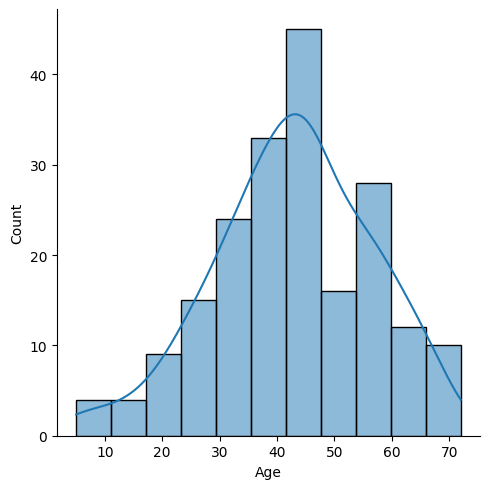

In [132]:
age_ = (
    data
    .loc[(data.TotalRevenue == 0) & (data.DaysSinceLastStay != -1)]
    .Age
)

sns.displot(age_, kind='hist', kde=True)

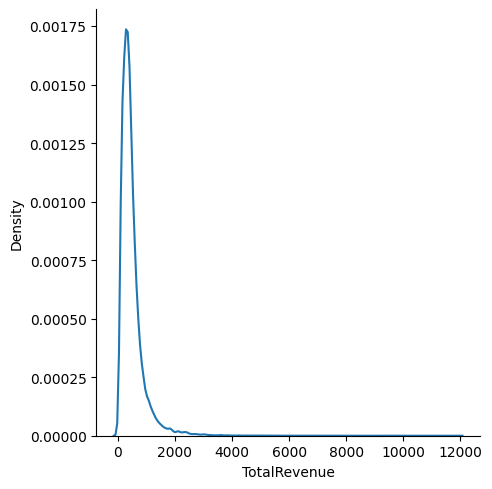

In [133]:
revenue_ = (
    data
    .loc[(data.TotalRevenue > 0) & (data.DaysSinceLastStay != -1)]
    .TotalRevenue

)

sns.displot(revenue_,kind='kde')

- the distribution is still right-skewed even after not including the `TotalRevenue=0` rows.

**We identified 19,066 customers with TotalRevenue = 0 due to cancellations or no-shows, which is expected. However, 200 customers checked in and completed 235 bookings with zero revenue—most from the Complementary market segment and almost all from Portugal. This indicates intentional non-revenue stays (e.g., promotions, internal use) that inflate occupancy but contribute no revenue. Including these in performance metrics like RevPAR or revenue per booking can distort business insights. We recommend segmenting or excluding these cases from core revenue KPIs to maintain accurate financial analysis.**

Further Analysis:

  - Can we approximate the amount of revenue lost in this?
  - Determine if high-demand dates are being blocked by zero-revenue stays (opportunity cost).

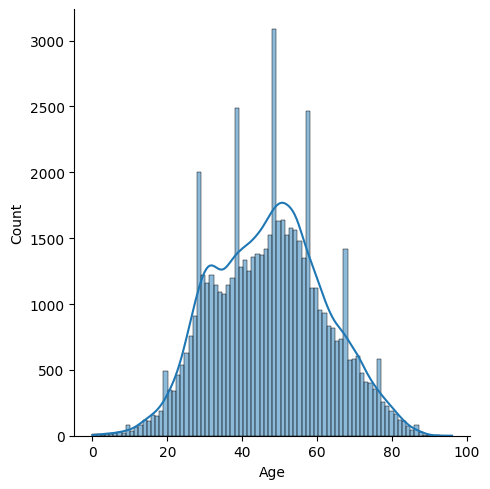

In [134]:
_data = data.loc[data.TotalRevenue>0]

sns.displot(_data.Age, kind='hist', kde=True)

- For further analysis, we will exclude zero-revenue customers from the dataset.

In [135]:
data = (
        data
        .loc[data.TotalRevenue>0]
        .assign(
            CreationDate = lambda df_: pd.to_datetime(df_.CreationDate),
            AvgArrivalDate = lambda df_: pd.to_datetime(df_.AvgArrivalDate),
            FirstArrivalDate = lambda df_: pd.to_datetime(df_.FirstArrivalDate),
            LastArrivalDate = lambda df_: pd.to_datetime(df_.LastArrivalDate)
        )
)


In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60511 entries, 0 to 79775
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    60511 non-null  int64         
 1   Age                   60511 non-null  float64       
 2   DaysSinceCreation     60511 non-null  int64         
 3   AverageLeadTime       60511 non-null  int64         
 4   LodgingRevenue        60511 non-null  float64       
 5   OtherRevenue          60511 non-null  float64       
 6   BookingsCanceled      60511 non-null  int64         
 7   BookingsNoShowed      60511 non-null  int64         
 8   BookingsCheckedIn     60511 non-null  int64         
 9   PersonsNights         60511 non-null  int64         
 10  RoomNights            60511 non-null  int64         
 11  DaysSinceLastStay     60511 non-null  int64         
 12  DaysSinceFirstStay    60511 non-null  int64         
 13  DistributionChannel  

In [137]:
data.shape

(60511, 36)

In [138]:
pct_one = (
    data
    .loc[data.TotalBookings == 1]
    .shape[0]
    /len(data)*100
)

print(f"{np.round(pct_one)}% of our total customers have made only single booking.")

98.0% of our total customers have made only single booking.


With **98% of customers making only one booking** and **24% generating zero revenue**, the sharply right-skewed revenue distribution highlights that a small segment of customers contributes the majority of income. This underscores the need to identify high-value customers for targeted retention strategies, while also investigating the substantial share of non-revenue bookings to uncover potential issues in pricing, promotions, or operational processes.

Since the dataset does not contain detailed records of each booking but is instead aggregated at the customer level, and given that 98% of the customers have made only a single booking, we can reasonably assume that the `CreationDate` represents the actual booking date for the vast majority of customers. For the small minority (2%) who may have made multiple bookings, we will consider only their first booking by taking the earliest `CreationDate`, thereby maintaining consistency while minimizing distortion in the overall analysis.


In [139]:
# Percent Change in the revenue

(
    data.
    groupby(data.CreationDate.dt.year)
    .sum('TotalRevenue')
    .TotalRevenue
    .to_frame()
    .assign(
        PercentChange = lambda df_ : np.round(df_.pct_change()*100,2)
    )
)

,TotalRevenue,PercentChange
CreationDate,,
2016,7680148.71,NaN
2017,10594862.03,37.95
2018,11255487.42,6.24


The hotel saw a strong **37.95% revenue increase in 2017** over 2016, indicating rapid growth, likely driven by higher bookings or improved operations. In 2018, revenue continued to rise by **6.24%**, suggesting stabilized growth. This trend reflects a healthy business trajectory with potential to explore what fueled the 2017 spike and how to sustain momentum.


In [140]:
# Percent Change in the revenue

revenue_dist = (
    data.
    groupby([data.CreationDate.dt.year, data.CreationDate.dt.month])
    .sum('TotalRevenue')
    .TotalRevenue
    .to_frame()
    .assign(
        PercentChange = lambda df_ : np.round(df_.pct_change()*100,2)
    )
)

revenue_dist.index.names = ['Year', 'Month']

# Reset to columns and create a datetime column for plotting
revenue_dist_plot = (
    revenue_dist
    .reset_index()
    .assign(Date=lambda df: pd.to_datetime(df[['Year', 'Month']].assign(DAY=1)))
    .set_index('Date')
)

revenue_dist_plot

,Year,Month,TotalRevenue,PercentChange
Date,,,,
2016-01-01,2016,1,162385.01,NaN
2016-02-01,2016,2,168372.19,3.69
2016-03-01,2016,3,493233.42,192.94
2016-04-01,2016,4,590258.01,19.67
2016-05-01,2016,5,700298.86,18.64
2016-06-01,2016,6,640148.49,-8.59
2016-07-01,2016,7,807696.49,26.17
2016-08-01,2016,8,1068417.77,32.28
2016-09-01,2016,9,927945.21,-13.15


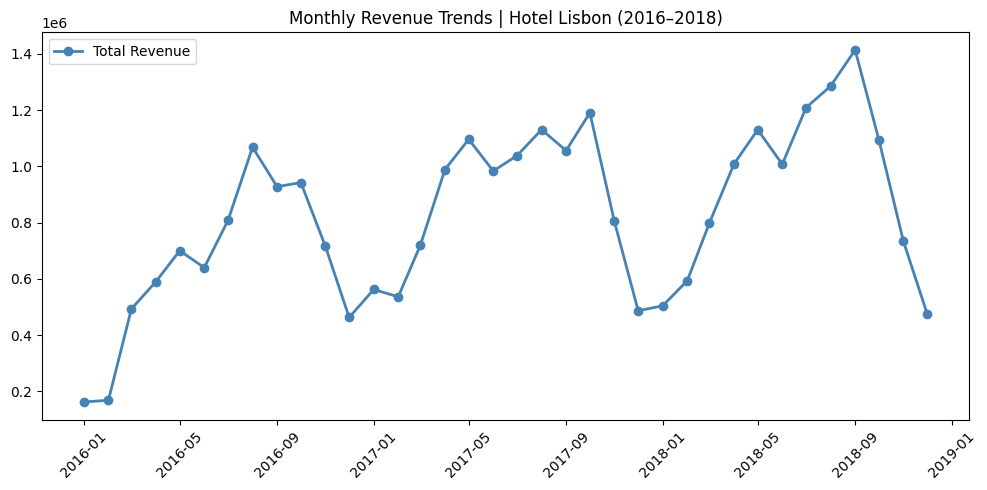

In [141]:
plt.figure(figsize=(10, 5))
plt.plot(revenue_dist_plot.index, revenue_dist_plot['TotalRevenue'], marker='o', label='Total Revenue',  linewidth=2, color='steelblue')
plt.title("Monthly Revenue Trends | Hotel Lisbon (2016–2018)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

1. **Strong Seasonality Drives Revenue Peaks & Troughs:**

  - **Peak performance:** Revenue consistently surges between May and September each year, with 2018 achieving a record monthly revenue of €1.41 million in September.

  - **Year-end downturns:** Revenue declines sharply every year from October through December. For example, December 2018 revenue fell to €475,663, a 66% drop from the September peak.

  - **Action:** Operations, staffing, and marketing budgets should be aligned to maximize high-season revenue and manage off-season costs.

2. **Year-on-Year Growth and Performance Fluctuations:**

  - **Overall growth:** Average monthly revenues and peak values increased each year, illustrating successful demand capture and/or improved sales strategies.

  - **Notable YOY growth:** March 2016 saw a +192.9% jump, suggesting a successful campaign or event effect.

  - **Continuous improvement:** 2018 outperformed previous high years. July–September 2018 all exceeded €1.2 million monthly, with September hitting the all-time high.

  - **Action:** Evaluate and replicate factors leading to above-average growth periods. Identify elements that drove the strong summer of 2018.

3. **Revenue Volatility Highlights Demand Sensitivity:**

  - **Steep drops:** The hotel experiences significant off-season declines, with monthly drops as high as -39.5% (December 2017 vs. November) and drops exceeding -30% every November and December.

  - **Growth surges:** Several months witness double-digit growth, especially in early summer (April–May and July–August), underlining the importance of capturing pent-up seasonal demand.

Between 2016 and 2018, the hotel saw consistent revenue growth, rising from €162K in January 2016 to a record €1.41M in September 2018—a nearly **770% increase** across peak months. Revenue surged steadily each summer, with **August 2016 (€1.07M)**, **August 2017 (€1.13M)**, and **September 2018 (€1.41M)** marking yearly highs. These gains were followed by sharp seasonal declines, with December revenues dropping to **€462K in 2016**, **€487K in 2017**, and **€476K in 2018**, averaging over **35% month-over-month drops** from November. Volatility ranged from **+193% in March 2016** (likely event- or campaign-driven) to **-39.5% in December 2017**, highlighting extreme sensitivity to seasonality. The top-performing months (May–September) consistently generated over **€1M**, while January–February averaged just **€250K–€550K**, emphasizing the importance of dynamic pricing, targeted promotions, and agile operational planning during off-peak periods. Strategic resource alignment and seasonal marketing can help sustain performance across the revenue cycle.

- Let's do a Quarterly Analysis

In [142]:
revenue_dist_quar = (
    data
    .groupby([data.CreationDate.dt.year, data.CreationDate.dt.quarter])
    .sum(numeric_only=True)['TotalRevenue']
    .to_frame()
    .assign(
        PercentChange = lambda df_: np.round(df_.pct_change() * 100, 2)
    )
)

# Set appropriate index names
revenue_dist_quar.index.names = ['Year', 'Quarter']

# Convert quarter to starting month and create a datetime for plotting
revenue_dist_quar_plot = (
    revenue_dist_quar
    .reset_index()
    .assign(
        Month=lambda df: df['Quarter'].map({1:1, 2:4, 3:7, 4:10}),
        Date=lambda df: pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))
    )
    .set_index('Date')
    .drop(columns='Month')
)

revenue_dist_quar_plot


,Year,Quarter,TotalRevenue,PercentChange
Date,,,,
2016-01-01,2016,1,823990.62,NaN
2016-04-01,2016,2,1930705.36,134.31
2016-07-01,2016,3,2804059.47,45.23
2016-10-01,2016,4,2121393.26,-24.35
2017-01-01,2017,1,1819017.83,-14.25
2017-04-01,2017,2,3068984.85,68.72
2017-07-01,2017,3,3225222.38,5.09
2017-10-01,2017,4,2481636.97,-23.06
2018-01-01,2018,1,1896668.82,-23.57


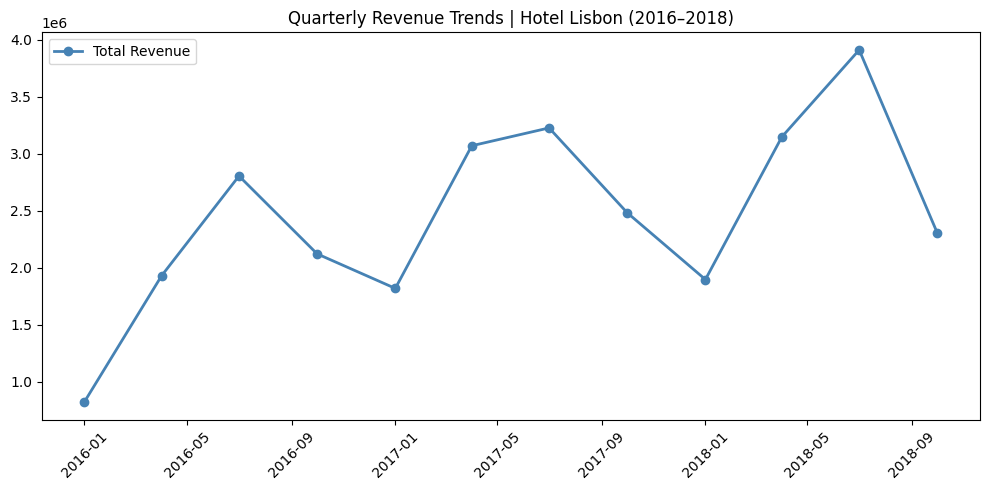

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(revenue_dist_quar_plot.index, revenue_dist_quar_plot['TotalRevenue'], marker='o', label='Total Revenue',  linewidth=2, color='steelblue')
plt.title("Quarterly Revenue Trends | Hotel Lisbon (2016–2018)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

From 2016 to 2018, quarterly revenues at the Lisbon hotel nearly **quadrupled from €800K in Q1 2016 to a peak of nearly €3.9M in Q3 2018**, highlighting exceptional high-season performance. Revenue growth was most pronounced in Q2 and Q3 each year: **Q2 2016 (€1.9M)**, **Q2 2017 (€3.2M)**, and **Q2 2018 (€3.2M)**, with corresponding Q3 peaks of **€2.8M**, **€3.2M**, and **€3.9M**. These high-revenue periods were consistently followed by steep post-summer declines, with Q4 revenues dropping back toward **€1.9M–€2.4M** each year—translating to post-peak decreases of up to **€1.5M–€2M per quarter**. The dramatic surges and steep downturns, captured visually in the chart, reflect strong dependence on seasonal demand, emphasizing the need for aggressive optimization during peak quarters and creative strategies to reduce off-peak volatility. These patterns highlight not only robust annual growth but also the crucial importance of operational flexibility and sustained off-season marketing to drive year-round revenue.


**Let's look at the Total Revenue distribution across various segments**

In [144]:
data.columns

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'CreationDate', 'AvgArrivalDate', 'TotalRevenue',
       'TotalBookings', 'SpecialRequests', 'FirstArrivalDate',
       'LastArrivalDate', 'Country'],
      dtype='object')

- **TotalRevenue vs Country:**

In [145]:
(
    data
    .Country
    .value_counts()
    .values
)

array([9374, 7888, 6565, 6471, 3934, 2558, 2429, 2328, 2059, 2021, 1589,
       1489, 1093,  978,  907,  676,  673,  577,  567,  523,  468,  447,
        414,  370,  232,  215,  192,  182,  177,  152,  151,  150,  143,
        137,  127,  121,  120,  112,  111,   94,   70,   63,   61,   61,
         60,   58,   58,   55,   54,   53,   53,   52,   50,   47,   47,
         35,   33,   30,   30,   29,   29,   27,   26,   26,   22,   21,
         21,   19,   18,   18,   18,   16,   14,   14,   14,   14,   14,
         13,   13,   11,   10,   10,   10,   10,   10,    9,    9,    8,
          8,    8,    8,    8,    8,    7,    7,    7,    6,    6,    6,
          6,    6,    6,    5,    5,    5,    5,    5,    5,    4,    4,
          4,    4,    4,    4,    3,    3,    3,    3,    3,    3,    3,
          3,    3,    3,    3,    3,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          1,    1,    1,    1,    1,    1,    1,   

In [146]:
top_15_revenue = (
    data
    .groupby(data.Country)
    .sum(numeric_only=True)['TotalRevenue']
    .sort_values(ascending=False)
    .nlargest(15)
    .sum()
)

total_revenue = data.TotalRevenue.sum()

print(f"Top 15 countries generate {(top_15_revenue/total_revenue)*100}% of the total revenue. So, we can club the remaining countries under one category called 'Others'.")



Top 15 countries generate 84.19367067663444% of the total revenue. So, we can club the remaining countries under one category called 'Others'.


In [147]:
country_revenue = (
    data
    .groupby('Country')['TotalRevenue']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_countries = country_revenue.head(15)

others = country_revenue.iloc[15:]
others_total = others['TotalRevenue'].sum()

top_with_others = pd.concat(
    [top_countries, pd.DataFrame([{'Country': 'Others', 'TotalRevenue': others_total}])],
    ignore_index=True
)


top_with_others

,Country,TotalRevenue
0,France,4841338.29
1,Germany,3837126.43
2,United Kingdom,3283562.38
3,Portugal,2292882.07
4,Spain,1795052.15
5,Belgium,1309676.85
6,Italy,1273150.23
7,Netherlands,1091244.05
8,United States,1086150.26
9,Brazil,973604.43


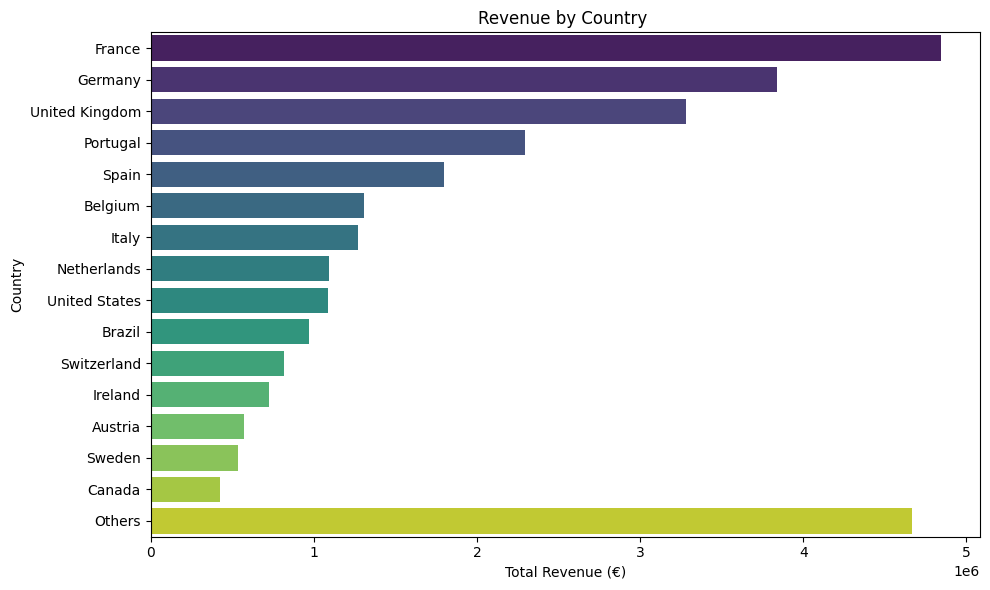

In [148]:

plt.figure(figsize=(10, 6))
sns.barplot(data=top_with_others, x='TotalRevenue', y='Country', hue='Country', palette='viridis', legend=False)
plt.title('Revenue by Country ')
plt.xlabel('Total Revenue (€)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

- **TotalRevenue vs MarketSegment:**

In [149]:
pd.pivot_table(
    data.assign(Year=data['CreationDate'].dt.year),
    values='TotalRevenue',
    index='Year',
    columns='MarketSegment',
    aggfunc='sum'
)


MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
Year,,,,,,,
2016,66440.15,10535.12,240329.18,860404.97,515358.54,4856860.73,1130220.02
2017,35332.65,1837.09,181327.24,1482367.86,993576.37,6619682.96,1280737.86
2018,41435.70,6823.84,313100.16,1874786.73,1577311.91,6434975.92,1007053.16


- **TotalRevenue vs DistributionChannel:**

In [150]:
pd.pivot_table(
    data.assign(Year=data['CreationDate'].dt.year),
    values='TotalRevenue',
    index='Year',
    columns='DistributionChannel',
    aggfunc='sum'
)

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
Year,,,,
2016,386256.87,872639.18,19219.80,6402032.86
2017,231286.27,1478250.61,49157.98,8836167.17
2018,296778.47,1867660.60,90382.07,9000666.28


## **Age & AverageLeadTime:**

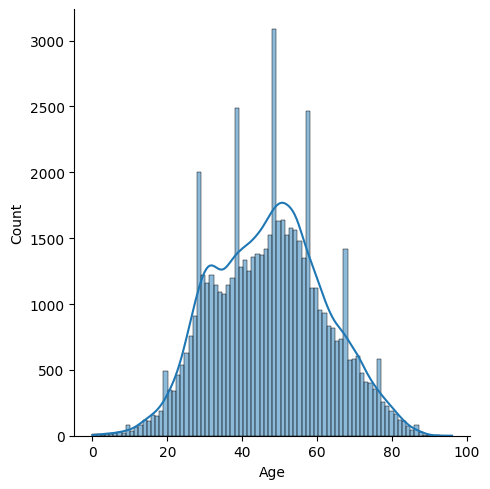

In [151]:
sns.displot(data.Age, kde=True)
plt.show()

- The distribution is unimodal with a peak around age 50, showing that the majority of customers are middle-aged adults. This could represent business travelers or higher-income vacationers. We can create age segments for targeted marketing or service personalization.

In [152]:
# Creating Age segments

data = (
    data
    .assign(
        AgeGroup = pd.cut(
            data.Age,
            bins=[0,17,29,44,59,74,float('inf')],
            labels=['Children/Teens','Young Adults', 'Early Middle Age','Late Middle Age','Young Seniors','Elderly'],
            right=True
        )
    )
)

data.sample(5)

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,CreationDate,AvgArrivalDate,TotalRevenue,TotalBookings,SpecialRequests,FirstArrivalDate,LastArrivalDate,Country,AgeGroup
65883,69410,23.0,128,313,459.00,63.0,0,0,1,9,3,131,131,Travel Agent/Operator,Other,1,0,0,0,0,0,0,0,0,0,0,0,0,2018-08-25,2019-07-04,522.00,1,1,2018-08-22,2018-08-22,United Kingdom,Young Adults
78020,81779,36.0,22,44,258.40,32.4,0,0,1,4,4,26,26,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-12-09,2019-01-22,290.80,1,0,2018-12-05,2018-12-05,Portugal,Early Middle Age
69716,73312,24.0,100,39,2200.00,87.0,0,0,2,4,4,100,101,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-09-22,2018-10-31,2287.00,2,0,2018-09-21,2018-09-22,Netherlands,Young Adults
55724,58968,64.0,206,220,331.04,114.0,0,0,1,6,3,209,209,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-06-08,2019-01-14,445.04,1,1,2018-06-05,2018-06-05,United Kingdom,Young Seniors
71627,75256,45.0,85,7,159.00,3.0,0,0,1,1,1,86,86,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,2018-10-07,2018-10-14,162.00,1,1,2018-10-06,2018-10-06,United Kingdom,Late Middle Age


In [153]:
(
    data
    .AgeGroup
    .value_counts()
)

,count
AgeGroup,
Late Middle Age,21751
Early Middle Age,18339
Young Seniors,10571
Young Adults,6669
Elderly,2250
Children/Teens,930


The hotel's customer base is predominantly composed of Late Middle Age (45–59 years) and Early Middle Age (30–44 years) guests, together accounting for the majority of bookings and likely representing working professionals or seasoned travelers. Young Seniors (60–74 years) also form a significant segment, indicating strong engagement from older leisure travelers. In contrast, Young Adults (18–29 years) and Children/Teens are underrepresented, suggesting potential areas for targeted marketing or experience redesign. This distribution highlights an opportunity to focus on enhancing services for mature age groups while exploring strategies to attract younger demographics.

We can look at the distribution of the above age segments across various other dimensions.




- **AverageLeadTime vs AgeGroup:**

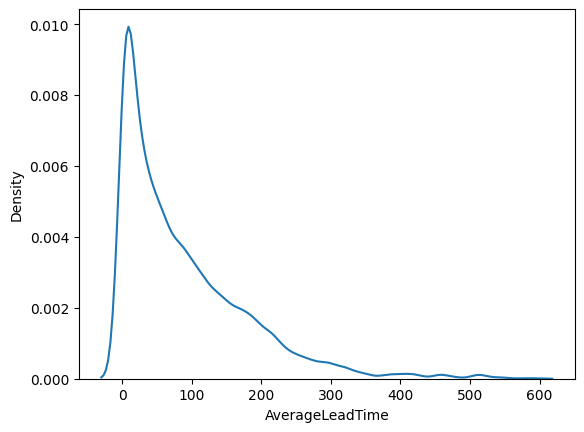

In [154]:
# Distribution of AverageLeadTime

sns.kdeplot(data.AverageLeadTime)
plt.show()

The distribution of Average Lead Time is heavily right-skewed, indicating that most hotel bookings are made within a short time frame before arrival, typically under 50 days. There is a sharp peak in last-minute bookings, while a long but thin tail shows that a smaller segment of guests plans well in advance (over 100 days). This suggests the majority of customers are short-notice planners, with only a few high-lead-time outliers—possibly older travelers or international guests—who book early.

We can create segments from the AverageLeadTime column to extract more impactful insights.

In [155]:
# Creating LeadTimeSegment from the AverageLeadTime column

data = (
    data
    .assign(
        LeadTimeSegment = pd.cut(
            data['AverageLeadTime'],
            bins=[-1, 7, 30, 90, 180, data['AverageLeadTime'].max()],
            labels=[
                'Last-Minute',
                'Short-Term Planners',
                'Medium-Term Planners',
                'Early Planners',
                'Very Early Planners'
            ]
        )
    )
)

data.LeadTimeSegment.value_counts()


,count
LeadTimeSegment,
Medium-Term Planners,16996
Early Planners,13920
Short-Term Planners,11228
Last-Minute,9561
Very Early Planners,8806


The distribution of booking behaviors reveals that the majority of guests plan their stays in advance, with Medium-Term Planners (31–90 days) accounting for the largest segment (≈17k customers). This is followed by Early Planners (91–180 days) and Short-Term Planners (8–30 days), indicating a strong preference for structured, forward-planned travel. Interestingly, Last-Minute bookings (0–7 days) are also substantial (~9.5k customers), likely driven by local or urgent travel. Meanwhile, Very Early Planners (181+ days) form a smaller, niche group, possibly representing international travelers, weddings, or corporate block bookings. This segmentation is useful for tailoring promotions and demand forecasting.

Let's look at the distribution of AgeGroup with LeadTimeSegment to figure out if there is a pattern in the lead time with age.

In [156]:
pd.pivot_table(
    data,
    values='TotalBookings',
    index='AgeGroup',
    columns='LeadTimeSegment',
    aggfunc='sum',
    observed=True
)

LeadTimeSegment,Last-Minute,Short-Term Planners,Medium-Term Planners,Early Planners,Very Early Planners
AgeGroup,,,,,
Children/Teens,114,140,233,278,171
Young Adults,1116,1445,2153,1562,579
Early Middle Age,3926,4125,5419,3880,1663
Late Middle Age,4068,4597,6125,5315,3022
Young Seniors,1235,1653,3072,2582,2418
Elderly,139,204,438,483,1057


Let's look at the distribution of LeadTimeSegment and AgeGroup with Country to see where are our customers from and how in advance they book hotel.

In [157]:
top_countries = (
    data.groupby('Country')['TotalBookings']
    .sum()
    .nlargest(15)
    .index
)

data_top15 = (
    data
    .assign(Country=lambda df: df['Country'].where(df['Country'].isin(top_countries), 'Others'))
)

pivot_top15 = pd.pivot_table(
    data_top15,
    values='TotalBookings',
    index='LeadTimeSegment',
    columns='Country',
    aggfunc='sum',
    observed=True
)

pivot_percent_per_country = (
    pivot_top15
    .div(pivot_top15.sum(axis=0), axis=1)
    .multiply(100)
    .round(2)
)

pivot_percent_per_country

Country,Austria,Belgium,Brazil,Canada,France,Germany,Ireland,Italy,Netherlands,Others,Portugal,Spain,Sweden,Switzerland,United Kingdom,United States
LeadTimeSegment,,,,,,,,,,,,,,,,
Last-Minute,10.14,9.78,14.05,10.92,12.83,9.23,9.53,13.34,13.79,18.04,39.88,23.81,11.10,9.88,9.62,16.33
Short-Term Planners,12.84,14.76,21.34,11.11,20.02,12.78,17.34,21.04,19.73,21.74,25.33,24.48,15.58,18.46,15.32,19.91
Medium-Term Planners,29.71,29.95,29.26,29.86,31.93,23.93,33.22,29.99,29.48,27.99,18.09,31.06,32.02,32.82,27.08,29.35
Early Planners,30.25,29.19,26.03,27.54,24.88,22.18,28.52,23.29,25.77,22.27,11.08,14.28,28.82,26.23,26.84,21.86
Very Early Planners,17.06,16.32,9.32,20.58,10.34,31.88,11.38,12.35,11.22,9.97,5.62,6.37,12.49,12.62,21.14,12.54


In [158]:

pivot_percent_per_segment = (
    pivot_top15
    .div(pivot_top15.sum(axis=1), axis=0)
    .multiply(100)
    .round(2)
)

pivot_percent_per_segment

Country,Austria,Belgium,Brazil,Canada,France,Germany,Ireland,Italy,Netherlands,Others,Portugal,Spain,Sweden,Switzerland,United Kingdom,United States
LeadTimeSegment,,,,,,,,,,,,,,,,
Last-Minute,1.07,2.19,2.75,1.07,11.51,6.97,1.36,3.30,2.74,15.47,30.02,9.14,0.98,1.50,6.07,3.87
Short-Term Planners,1.18,2.88,3.63,0.95,15.64,8.41,2.15,4.54,3.41,16.24,16.61,8.19,1.20,2.44,8.42,4.11
Medium-Term Planners,1.90,4.07,3.47,1.77,17.40,10.98,2.88,4.51,3.56,14.58,8.27,7.25,1.72,3.03,10.38,4.23
Early Planners,2.39,4.91,3.82,2.02,16.77,12.59,3.06,4.33,3.84,14.35,6.27,4.12,1.91,2.99,12.72,3.89
Very Early Planners,2.13,4.34,2.17,2.39,11.03,28.64,1.93,3.64,2.65,10.17,5.03,2.91,1.31,2.28,15.86,3.53


**Insights from `pivot_percent_per_country` (Column-wise %):**

This table shows how each country's bookings are distributed across planning segments.


- **Portugal** has the **highest share of Last-Minute bookings (39.88%)**, indicating that domestic travelers tend to book closer to the stay date. This may be due to ease of access and lower travel planning required.

- **Spain (23.81%)** and **France (12.83%)** also show a relatively high proportion of Last-Minute bookings, supporting the idea that **proximity** to Portugal encourages short-notice travel.

- **Northern and Western European countries** (e.g., **Sweden**, **Switzerland**, **Germany**, **UK**) and **long-haul countries** like the **United States** tend to lean toward **Medium-Term (e.g., \~29–33%)** and **Early Planners** categories. These travelers likely need more planning time due to longer travel distances and logistics.

- **Very Early Planners** are especially prominent in **Germany (31.88%)** and the **United Kingdom (21.14%)**, indicating that travelers from these regions often book well in advance—possibly to secure better deals or accommodate longer holidays.

- **Brazil** has a broad distribution across **Medium-Term**, **Early**, and **Short-Term** Planners, but with a moderate inclination toward planning ahead.

- **Canada** shows a strong tendency to plan ahead, with nearly **80%** of bookings in **Medium** to **Very Early** segments. This makes sense given the international distance, visa needs, and higher travel complexity from North America.

---



**Insights from `pivot_percent_per_segment` (Row-wise %):**

This shows **which countries dominate within each planning segment**.

- **Portugal** dominates the **Last-Minute segment** (30%) and **Short-Term segment** (16%), followed by **Others**, **Spain**, and **France** — suggesting that Southern European countries, especially those geographically **close to Portugal**, are major contributors to last-minute bookings. This aligns with the fact that the hotel is located in Portugal, making it more accessible for neighboring countries to book spontaneous stays.

- In the **Medium-Term** and **Early Planners** segments, the contribution is more diversified with **France**, **Others**, **UK**, and **Germany** standing out.

- The **Very Early Planners** segment is largely driven by **Germany** (29%) and **UK** (16%) — showing these countries have a strong early-booking culture.


- **AgeGroup vs SpecialRequests:**

In [159]:
(
    data
    .groupby('AgeGroup', observed=False)['SpecialRequests']
    .sum()
)

,SpecialRequests
AgeGroup,
Children/Teens,671
Young Adults,4469
Early Middle Age,11770
Late Middle Age,13720
Young Seniors,7037
Elderly,1414


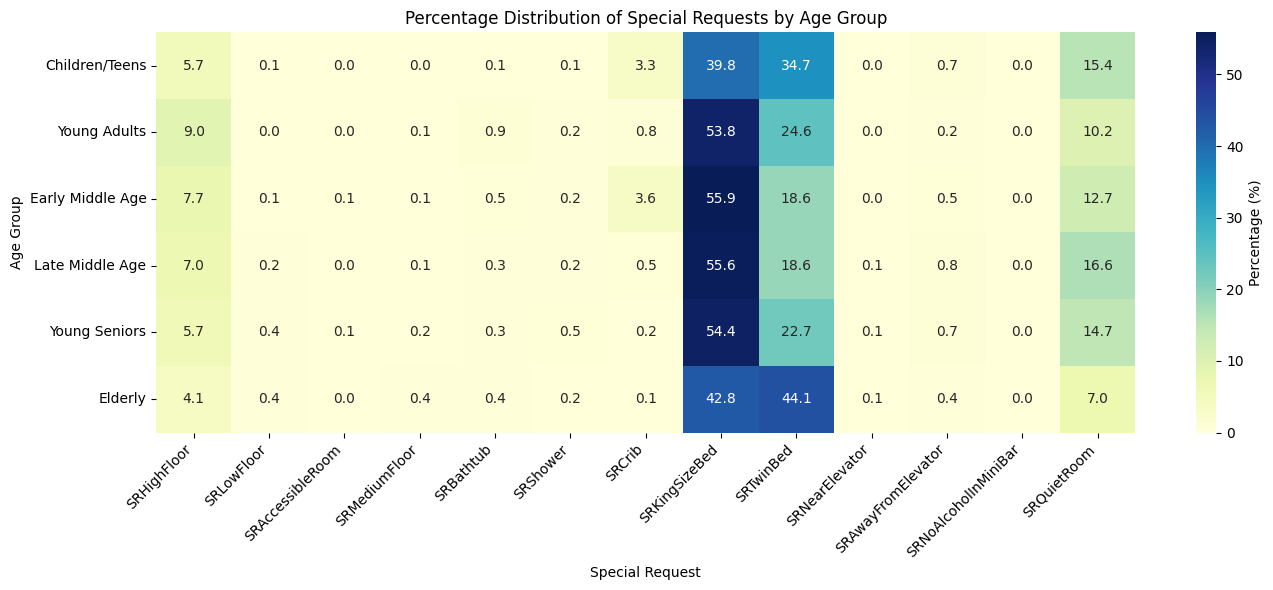

In [160]:
request = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
    'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
    'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
    'SRQuietRoom'
]

age_request_counts = (
    data
    .groupby('AgeGroup', observed=False)[request]
    .sum()
)

age_request_percent = age_request_counts.div(age_request_counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 6))
sns.heatmap(age_request_percent, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage (%)'})
plt.title("Percentage Distribution of Special Requests by Age Group")
plt.ylabel("Age Group")
plt.xlabel("Special Request")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### **Insights:**

* **King-size bed**, **Twin beds**, **Quiet Room**, and **High floor** are the most common special requests customers ask for.
* **King-size bed** is **consistently the top preference**, especially for **Early and Late Middle Age (55–56%)**.
* **Twin beds** are **most popular among Children/Teens (35%) and Elderly (44%)** — likely due to shared arrangements or mobility needs.
* **Quiet room requests** are strongest for **Late Middle Age** — a growing demographic valuing peace and comfort.
* **Crib requests** peak at **3.6% for Early Middle Age**, reflecting young parents traveling with babies.
* Preferences like **“Away from Elevator”** and **“High Floor”** are minor but **more pronounced in Middle Age groups** — targeting upselling options.

#### **Recommendations:**


* **Personalized Offers**: Suggest king-size bed upgrades to working-age guests during booking.
* **Crib availability** should be ensured for guests in the 26–45 range.
* **Quiet room and high-floor rooms** could be packaged as a premium for guests aged 30+.
* Use **age data to pre-fill special request preferences** in future bookings (personalization).




In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60511 entries, 0 to 79775
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    60511 non-null  int64         
 1   Age                   60511 non-null  float64       
 2   DaysSinceCreation     60511 non-null  int64         
 3   AverageLeadTime       60511 non-null  int64         
 4   LodgingRevenue        60511 non-null  float64       
 5   OtherRevenue          60511 non-null  float64       
 6   BookingsCanceled      60511 non-null  int64         
 7   BookingsNoShowed      60511 non-null  int64         
 8   BookingsCheckedIn     60511 non-null  int64         
 9   PersonsNights         60511 non-null  int64         
 10  RoomNights            60511 non-null  int64         
 11  DaysSinceLastStay     60511 non-null  int64         
 12  DaysSinceFirstStay    60511 non-null  int64         
 13  DistributionChannel  

In [162]:
data = (
    data
    .assign(
        AgeGroup=lambda df: df['AgeGroup'].astype('object'),
        LeadTimeSegment=lambda df: df['LeadTimeSegment'].astype('object')
    )
)

data.select_dtypes('object').columns

Index(['DistributionChannel', 'MarketSegment', 'Country', 'AgeGroup',
       'LeadTimeSegment'],
      dtype='object')

In [163]:
pd.pivot_table(data,  values='TotalBookings', index='AgeGroup', columns='MarketSegment', aggfunc='sum')

MarketSegment,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
AgeGroup,,,,,,,
Children/Teens,NaN,4.0,6.0,174.0,31.0,635.0,86.0
Early Middle Age,59.0,58.0,919.0,2760.0,1953.0,11055.0,2209.0
Elderly,1.0,2.0,33.0,151.0,793.0,583.0,758.0
Late Middle Age,237.0,103.0,1451.0,3039.0,2240.0,13124.0,2933.0
Young Adults,1.0,85.0,188.0,814.0,445.0,4328.0,994.0
Young Seniors,62.0,19.0,318.0,1192.0,1897.0,5386.0,2086.0


In [164]:
pd.pivot_table(data,  values='TotalBookings', index='AgeGroup', columns='DistributionChannel', aggfunc='sum')

DistributionChannel,Corporate,Direct,Electronic Distribution,Travel Agent/Operator
AgeGroup,,,,
Children/Teens,7.0,179.0,NaN,750.0
Early Middle Age,1010.0,2820.0,220.0,14963.0
Elderly,49.0,156.0,2.0,2114.0
Late Middle Age,1714.0,3150.0,208.0,18055.0
Young Adults,160.0,890.0,53.0,5752.0
Young Seniors,425.0,1182.0,14.0,9339.0


In [165]:
data.columns

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'CreationDate', 'AvgArrivalDate', 'TotalRevenue',
       'TotalBookings', 'SpecialRequests', 'FirstArrivalDate',
       'LastArrivalDate', 'Country', 'AgeGroup', 'LeadTimeSegment'],
      dtype='object')

### **RFM Analysis:**

#### **Customer Segmentaion using K-means clustering algorithm on the RFM values**

**DaysSinceLastStay(Recency), TotalBookings(Frequency) & TotalRevenue(Monetary)**

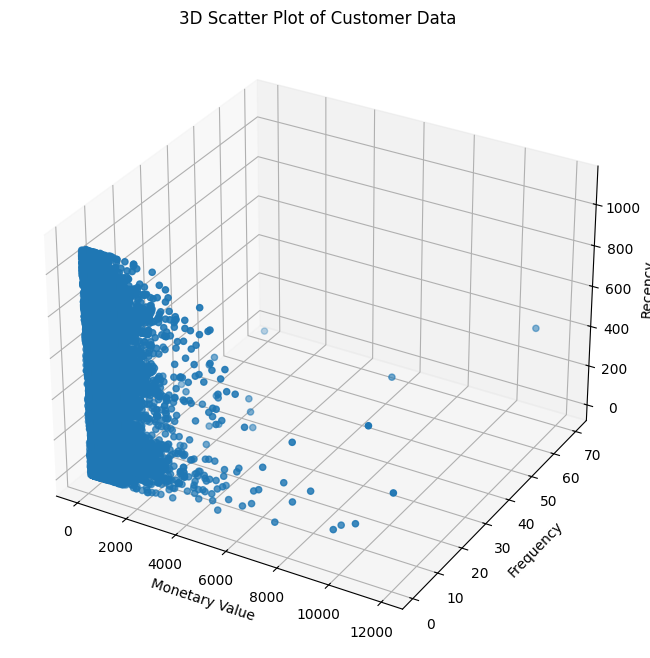

In [166]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(data["TotalRevenue"], data["TotalBookings"], data["DaysSinceLastStay"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

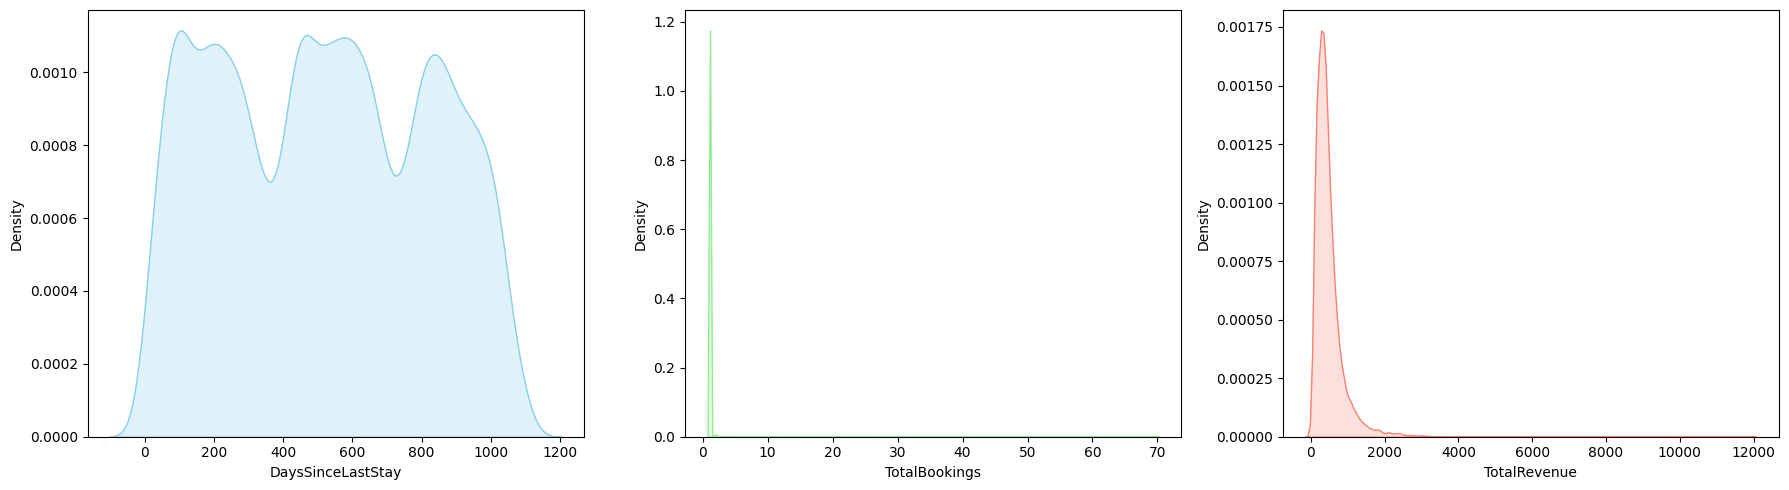

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data['DaysSinceLastStay'], ax=axes[0], fill=True, color='skyblue')
sns.kdeplot(data['TotalBookings'], ax=axes[1], fill=True, color='lightgreen')
sns.kdeplot(data['TotalRevenue'], ax=axes[2], fill=True, color='salmon')

plt.tight_layout()
plt.show()

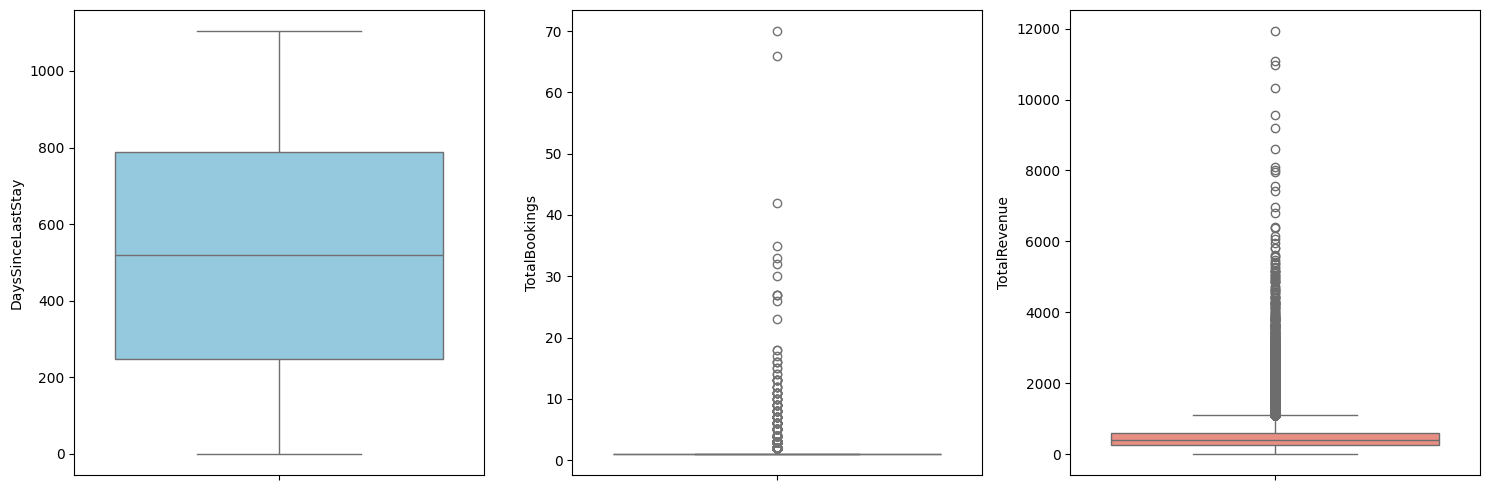

In [168]:
# Using Boxplot to detect outliers

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data.DaysSinceLastStay, color='skyblue')

plt.subplot(1,3,2)
sns.boxplot(data.TotalBookings,  color='lightgreen')

plt.subplot(1,3,3)
sns.boxplot(data.TotalRevenue,  color='salmon')

plt.tight_layout()
plt.show()

We can confirm from the boxplots that the `DaysSinceLastStay` column does not have any outliers but the other two columns `TotalBookings` and `TotalRevenue` has fairly huge number of outliers because of highly right-skewed distribution.
Since, these are our actual customers and are important for our analysis so we can't drop them.
These values are valid from the business point of view as they are genuine customer records; however, they are outliers from the data analysis point of view. Therefore, these instances should be isolated from the majority and treated separately.

In [169]:
data.TotalBookings.value_counts()

,count
TotalBookings,
1,59144
2,1068
3,129
4,53
5,23
6,15
8,13
7,12
9,9


In [170]:
data.TotalBookings.value_counts(normalize=True)*100

,proportion
TotalBookings,
1,97.740907
2,1.764968
3,0.213184
4,0.087587
5,0.038010
6,0.024789
8,0.021484
7,0.019831
9,0.014873


Since 99.5% of our data has `TotalBookings = 1 (97.7%)`and `TotalBookings = 2(1.7%)`, we need to deal with this separately. We get two groups of data: one group contains `TotalBookings >2` and the other contains `TotalBookings = 2`.


- The first group containing `TotalBookings <2` is the `non-outlier` group but here the Frequency value becomes irrelavant and we can perform segmentation only using Recency and Monetary values.

- The second group containing `TotalBookings >= 2` is the `outlier` group. We can perform separate segmentation here.


#### **TotalBookings < 2**

In [171]:
print(f"Total rows in the data: {len(data[data.TotalBookings<2])}")
print(f"Percentage of the original dataset: {len(data[data.TotalBookings<2])/len(data)*100} ")

Total rows in the data: 59144
Percentage of the original dataset: 97.74090661202095 


In [172]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [173]:
data_rfm = data.loc[data.TotalBookings < 2][['ID','DaysSinceLastStay','TotalBookings','TotalRevenue']].copy()
data_rfm.sample(5)

,ID,DaysSinceLastStay,TotalBookings,TotalRevenue
6620,7425,942,1,705.00
70174,73774,101,1,3005.00
4003,4425,997,1,1206.00
30115,32253,539,1,358.00
40762,43298,361,1,234.96


In [174]:
data_rfm.describe()

,ID,DaysSinceLastStay,TotalBookings,TotalRevenue
count,59144.000000,59144.000000,59144.0,59144.000000
mean,36516.181354,522.481553,1.0,477.266509
std,22819.575174,300.611848,0.0,412.032938
min,4.000000,1.000000,1.0,1.000000
25%,17722.750000,253.000000,1.0,241.600000
50%,33391.500000,525.000000,1.0,380.000000
75%,53671.250000,791.000000,1.0,576.000000
max,83589.000000,1104.000000,1.0,11930.660000


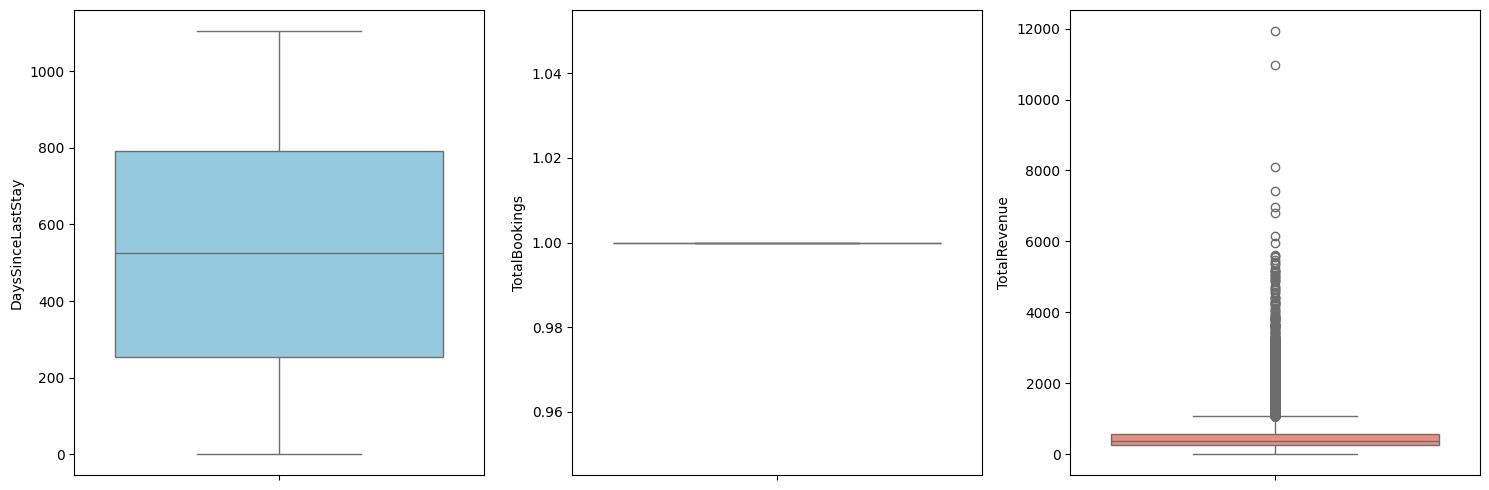

In [175]:
# Using Boxplot to detect outliers

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data_rfm.DaysSinceLastStay, color='skyblue')

plt.subplot(1,3,2)
sns.boxplot(data_rfm.TotalBookings,  color='lightgreen')

plt.subplot(1,3,3)
sns.boxplot(data_rfm.TotalRevenue,  color='salmon')

plt.tight_layout()
plt.show()

We are going to handle the outliers in the `TotalRevenue` column using the IQR method because our data is not normally distributed and skewed. It is also particularly good for RFM frequency and monetary values.



In [176]:
def iqr_filter(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3 - Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  return df[(df[column] < lower) | (df[column] > upper)]

monetary_outliers = iqr_filter(data_rfm, column='TotalRevenue')

monetary_outliers.describe()

,ID,DaysSinceLastStay,TotalBookings,TotalRevenue
count,3727.000000,3727.000000,3727.0,3727.000000
mean,41548.352831,458.554065,1.0,1646.524572
std,22508.728599,287.474348,0.0,709.048778
min,77.000000,3.000000,1.0,1077.660000
25%,22863.000000,173.000000,1.0,1206.000000
50%,38402.000000,453.000000,1.0,1406.500000
75%,64125.500000,681.000000,1.0,1836.000000
max,83546.000000,1104.000000,1.0,11930.660000


In [177]:
non_outliers = data_rfm[(~data_rfm.index.isin(monetary_outliers.index))]
non_outliers.describe()

,ID,DaysSinceLastStay,TotalBookings,TotalRevenue
count,55417.000000,55417.000000,55417.0,55417.000000
mean,36177.749048,526.780916,1.0,398.629541
std,22800.705409,300.990445,0.0,221.930793
min,4.000000,1.000000,1.0,1.000000
25%,17487.000000,259.000000,1.0,233.200000
50%,32957.000000,531.000000,1.0,362.000000
75%,52955.000000,794.000000,1.0,526.000000
max,83589.000000,1104.000000,1.0,1077.500000


/tmp/ipython-input-178-3052194107.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(non_outliers['TotalBookings'], ax=axes[1], fill=True, color='lightgreen')


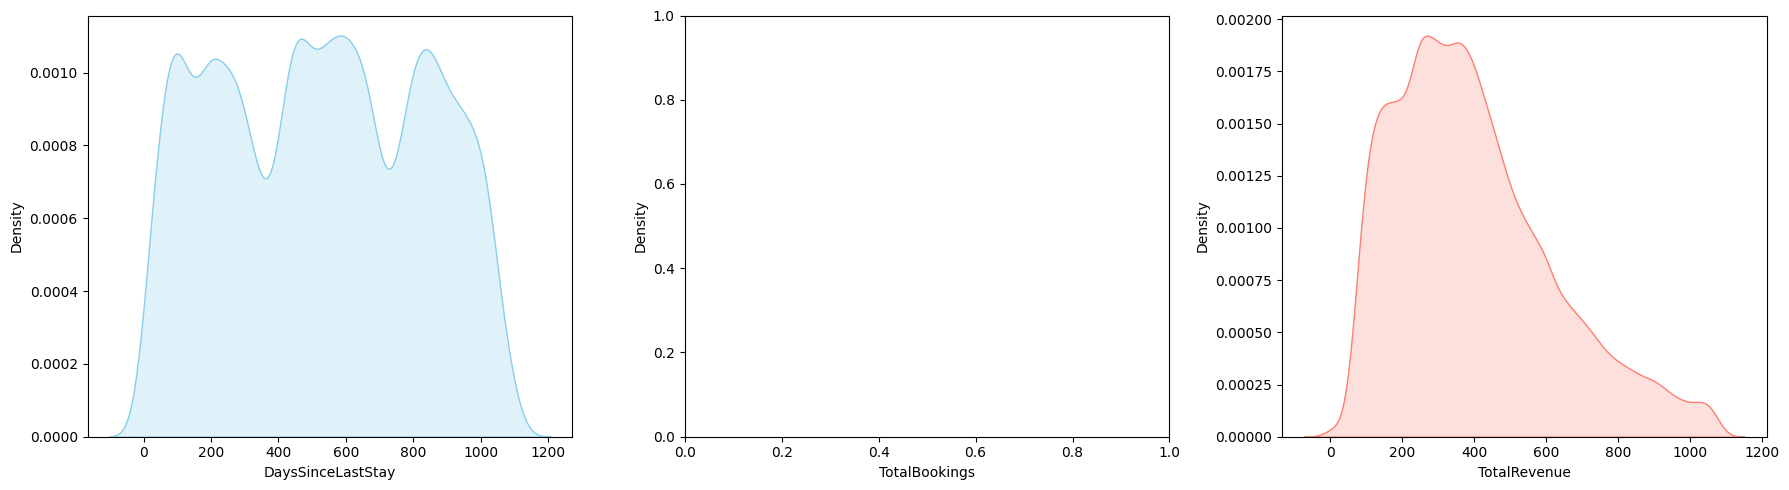

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(non_outliers['DaysSinceLastStay'], ax=axes[0], fill=True, color='skyblue')
sns.kdeplot(non_outliers['TotalBookings'], ax=axes[1], fill=True, color='lightgreen')
sns.kdeplot(non_outliers['TotalRevenue'], ax=axes[2], fill=True, color='salmon')

plt.tight_layout()
plt.show()

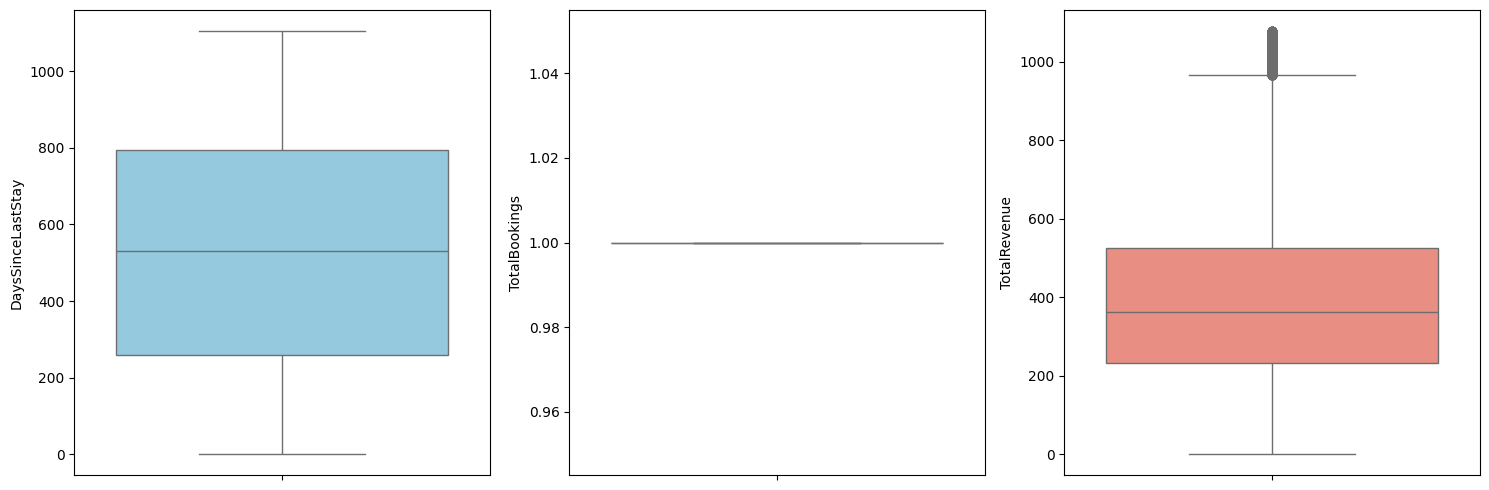

In [179]:
# Using Boxplot to detect outliers

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(non_outliers.DaysSinceLastStay, color='skyblue')

plt.subplot(1,3,2)
sns.boxplot(non_outliers.TotalBookings,  color='lightgreen')

plt.subplot(1,3,3)
sns.boxplot(non_outliers.TotalRevenue,  color='salmon')

plt.tight_layout()
plt.show()

- Now we have two sub-parts in the dataset.

In [180]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers[['DaysSinceLastStay','TotalBookings','TotalRevenue']])
scaled_data

array([[ 1.90445998,  0.        , -0.44441977],
       [ 1.8944928 ,  0.        , -0.65169346],
       [ 1.90445998,  0.        ,  1.03803773],
       ...,
       [-1.73688448,  0.        ,  0.19722749],
       [-1.74020688,  0.        ,  0.92809256],
       [-1.74020688,  0.        ,  2.66603742]])

In [181]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df.sample(7)


,MonetaryValue,Frequency,Recency
25459,0.276487,0.0,-0.551346
4398,1.532352,0.0,-0.844999
20904,0.519021,0.0,0.271125
46090,-0.780035,0.0,-0.092956
71416,-1.457803,0.0,-0.660705
26372,0.229973,0.0,-0.295723
2926,1.632024,0.0,0.477047


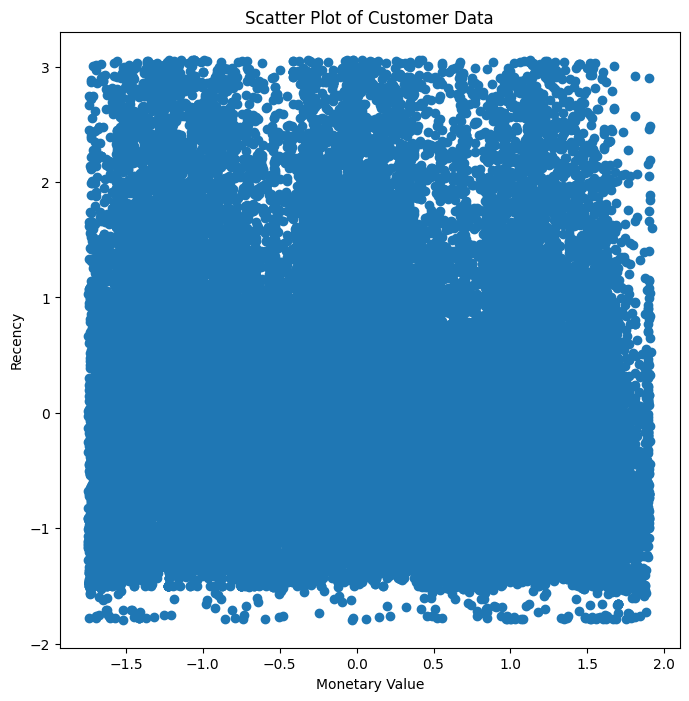

In [182]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot()

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Recency')

ax.set_title('Scatter Plot of Customer Data')

plt.show()

The scatter plot's dense, rectangular core with minimal separation indicates a lack of obvious natural clusters in the scaled Recency and Monetary dimensions for this subset. This uniformity can make KMeans ineffective, as it relies on variance to form distinct groups.

- Situation:

    - 97.74% of customers have only 1 booking → Frequency column is nearly constant.

    - Recency and Monetary are usable and scaled — but scatter plot is flat, showing no natural clusters.
  
- Therefore, we are going to use Rule-Based RFM Segmentation using simple business logic.



#### **Rule-Based RFM Segmentation:**

**RECENCY (R):**

* `DaysSinceLastStay` is well‑behaved (no extreme outliers) but spans roughly **0–1,104 days** with clear breakpoints at common guest return intervals (e.g. 3‑month, 6‑month, 1‑year).
* We’ll use **business‑driven bins** that map to typical hospitality lifecycles and campaign cadences:

  * **R = 5:**  0 –   90 days     (“Just visited” – prime for loyalty thank‑you or up‑sell)
  * **R = 4:**  91 –  180 days  (“Recent” – good targets for special offers)
  * **R = 3:**  181 –  365 days (“Moderately recent” – annual re‑engagement window)
  * **R = 2:**  366 –  730 days (“Dormant” – risk of churn; needs re‑activation)
  * **R = 1:**  > 730 days     (“Lost” – long‑term inactive)

---

**FREQUENCY (F):**

* `TotalBookings` is extremely right‑skewed: \~97.7% of customers have exactly 1 booking; the rest form a long tail up to \~70 bookings.
* Standard quantiles would collapse nearly everyone into the bottom bin, so we apply **custom, value‑reflective thresholds**:

  * **F = 1:** exactly 1 booking
  * **F = 2:** exactly 2 bookings
  * **F = 3:** 3–4 bookings
  * **F = 4:** 5–9 bookings
  * **F = 5:** ≥ 10 bookings

---

**MONETARY (M):**

* `TotalRevenue` is also heavily skewed (long tail up to \$11,930), so equal‑sized quantiles would group very different spenders together. We choose **business‑driven tiers** that align with low, mid, and VIP spending levels:

  * **M = 1:** ≤ 142           (“Very low spender”)
  * **M = 2:** 142.01 – 383    (“Low spender”)
  * **M = 3:** 383.01 – 653    (“Medium spender”)
  * **M = 4:** 653.01 – 901.96 (“High spender”)
  * **M = 5:** > 901.96          (“Top spender / VIP”)





`Customer Segments
`

| Segment Label           | Condition                           | Business Interpretation                                                                                         |
| ----------------------- | ----------------------------------- | --------------------------------------------------------------------------------------------------------------- |
| **Champions**           | R ≥ 4 & F ≥ 4 & M ≥ 4               | **Best customers:** visited very recently, booked often, and spent heavily. Top priority for loyalty rewards.   |
| **Loyal Customers**     | F ≥ 4 & M ≥ 4 & R ≥ 3               | **Consistent high value:** frequent and high spenders, with reasonably recent activity. Great for upsell.       |
| **Potential Loyalists** | R ≥ 4 & F ≥ 2 & M ≥ 2               | **Up‑and‑comers:** visited recently, moderate bookings and spend. Nurture toward full “Loyal” status.           |
| **New Customers**       | R ≥ 4 & F ≤ 2                       | **Fresh arrivals:** visited very recently but have only 1–2 bookings. Welcome offers / introductory promotions. |
| **Promising**           | R ≥ 2 & F ≥ 2 & M ≥ 2 & (R+F+M) ≥ 8 | **High potential:** decent recency, frequency, and spend sum to at least 8. Likely to become Loyal/Champion.    |
| **Need Attention**      | M ≥ 3 & F ≥ 3 & R ≤ 2               | **Waning activity:** good frequency & spend but haven’t visited recently. Trigger re‑engagement campaigns.      |
| **About to Sleep**      | M ≥ 2 & F ≥ 2 & R ≤ 2               | **Cooling off:** moderate spend and bookings but not recent. Early reactivation touch needed.                   |
| **At Risk**             | M ≥ 4 & R == 1                      | **High spend, long gone:** big spenders who haven’t visited in a long time. Critical re‑acquisition segment.    |
| **Cannot Lose Them**    | M == 5 & F ≥ 4 & R == 1             | **Top‑tier but inactive:** VIPs (top monetary and frequent) who are now churned. Highest‑priority win‑back.     |
| **Hibernating**         | R ≤ 2 & F ≤ 2 & M ≥ 2               | **Dormant moderate spenders:** some spend but no recent visits or bookings. Treat as lower‑priority re‑engage.  |
| **Lost**                | *default* (none of the above)       | **Anything else:** low recency, low frequency, low spend. Typically cold list or one‑time low spenders.         |

`Insights`

* **“Champions” & “Loyal Customers”** get exclusive VIP perks or early‑access offers.
* **“Potential Loyalists” & “Promising”** receive nurture campaigns (e.g. bundled deals).
* **“New Customers”** merit welcome discounts and onboarding info.
* **“Need Attention” & “About to Sleep”** should be targeted with personalized re‑engagement (e.g. “We miss you!”).
* **“At Risk” & “Cannot Lose Them”** are high‑value lapsed guests—run high‑touch win‑back campaigns.
* **“Hibernating”** get light‑touch reminders (e.g. seasonal newsletters).
* **“Lost”** may be deprioritized or only included in broad‑cast promos.




In [183]:
pd.set_option('display.max_columns', None)


def assign_frequency_score(bookings):
    if bookings == 1:
        return 1
    elif bookings == 2:
        return 2
    elif bookings in [3, 4]:
        return 3
    elif 5 <= bookings <= 9:
        return 4
    else:
        return 5

def assign_recency_score(LastStay):

    if LastStay <= 90:            # Very recent
        return 5
    elif LastStay <= 180:         # Recent
        return 4
    elif LastStay <= 365:         # Moderately Recent
        return 3
    elif LastStay <= 730:         # Dormant/ At-risk
        return 2
    else:                         # Lost/Churned
        return 1


def assign_monetary_score(revenue):

    if revenue <= 142.00:         # Very low spender
        return 1
    elif revenue <= 383.00:       # Low spender
        return 2
    elif revenue <= 653.00:       # Medium spender
        return 3
    elif revenue <= 901.96:       # High spender
        return 4
    else:                         # Top spender
        return 5



segment_analysis = (
    data
    .assign(
        recency_score = lambda df_: df_.DaysSinceLastStay.apply(assign_recency_score),
        frequency_score = lambda df_: df_.TotalBookings.apply(assign_frequency_score),
        monetary_score = lambda df_: df_.TotalRevenue.apply(assign_monetary_score)
    )
    .assign(
        rfm_code = lambda df_: df_.recency_score.astype(str) + df_.frequency_score.astype(str) + df_.monetary_score.astype(str),
        weighted_rfm_score = lambda df_ : (df_.recency_score.mul(0.4) + df_.frequency_score.mul(0.3) + df_.monetary_score.mul(0.3)).round(2),
        customer_segment = lambda df_ : np.select([
            (df_.recency_score >= 4) & (df_.frequency_score >= 4) & (df_.monetary_score >= 4),
            (df_.recency_score >= 4) & (df_.frequency_score >= 4) & (df_.monetary_score >= 3),
            (df_.recency_score >= 4) & (df_.frequency_score >= 2) & (df_.monetary_score >= 2),
            (df_.recency_score >= 4) & (df_.frequency_score <= 2),
            (df_.recency_score >= 2) & (df_.frequency_score >= 2) & (df_.monetary_score >= 2) & ((df_.recency_score + df_.frequency_score + df_.monetary_score) >= 8),
            (df_.monetary_score >= 3) & (df_.frequency_score >= 3) & (df_.recency_score <= 2),
            (df_.monetary_score >= 2) & (df_.frequency_score >= 2) & (df_.recency_score <= 2),
            (df_.monetary_score >= 4) & (df_.recency_score == 1),
            (df_.monetary_score == 5) & (df_.frequency_score >= 4) & (df_.recency_score == 1),
            (df_.recency_score <= 2) & (df_.frequency_score <= 2) & (df_.monetary_score >= 2),
            ],
            [
                'Champions',
                'Loyal Customers',
                'Potential Loyalists',
                'New Customers',
                'Promising',
                'Need Attention',
                'About to Sleep',
                'At Risk',
                'Cannot Lose Them',
                'Hibernating'
            ],
            default='Lost'
        )
    )
    .groupby('customer_segment')
    .agg(
        customer_count             = ('ID', 'count'),
        avg_recency_score          = ('recency_score', 'mean'),
        avg_frequency_score        = ('frequency_score', 'mean'),
        avg_monetary_score         = ('monetary_score', 'mean'),
        avg_weighted_rfm           = ('weighted_rfm_score', 'mean'),
        avg_revenue                = ('TotalRevenue', 'mean'),
        avg_bookings               = ('TotalBookings', 'mean'),
        avg_days_since_last_stay   = ('DaysSinceLastStay', 'mean'),
        avg_revenue_per_booking    = ('TotalRevenue', lambda df_: df_.sum() / data.loc[df_.index, 'TotalBookings'].sum()),
        avg_lead_time = ('AverageLeadTime', 'mean'),
        total_segment_revenue      = ('TotalRevenue', 'sum'),
        total_lodging_revenue = ('LodgingRevenue','sum'),
        total_other_revenue = ('OtherRevenue','sum'),
        min_revenue                = ('TotalRevenue', 'min'),
        max_revenue                = ('TotalRevenue', 'max'),
        min_bookings               = ('TotalBookings', 'min'),
        max_bookings               = ('TotalBookings', 'max'),
        total_bookings  = ('TotalBookings','sum'),
        total_bookings_canceled = ('BookingsCanceled','sum'),
        total_special_requests = ('SpecialRequests', 'sum'),
        min_days_since_last_stay   = ('DaysSinceLastStay', 'min'),
        max_days_since_last_stay   = ('DaysSinceLastStay', 'max'),
    )
    .reset_index()
    .pipe(lambda df_: df_.assign(
        percentage_of_base     = (df_['customer_count'] / df_['customer_count'].sum()).round(4).mul(100),
        revenue_contribution_pct = (df_['total_segment_revenue'] / df_['total_segment_revenue'].sum() * 100).round(2)
    ))
)

segment_order = [
    'Champions', 'Loyal Customers', 'Potential Loyalists', 'Promising', 'New Customers',
   'Need Attention', 'About to Sleep', 'At Risk',
    'Cannot Lose Them', 'Hibernating', 'Lost'
]
segment_analysis['segment_rank'] = segment_analysis['customer_segment'].apply(
    lambda df_: segment_order.index(df_) if df_ in segment_order else len(segment_order)
)
segment_analysis = (
    segment_analysis
    .sort_values('segment_rank')
    .drop('segment_rank', axis=1)
)

segment_analysis







,customer_segment,customer_count,avg_recency_score,avg_frequency_score,avg_monetary_score,avg_weighted_rfm,avg_revenue,avg_bookings,avg_days_since_last_stay,avg_revenue_per_booking,avg_lead_time,total_segment_revenue,total_lodging_revenue,total_other_revenue,min_revenue,max_revenue,min_bookings,max_bookings,total_bookings,total_bookings_canceled,total_special_requests,min_days_since_last_stay,max_days_since_last_stay,percentage_of_base,revenue_contribution_pct
2,Champions,49,4.693878,4.469388,4.795918,4.657143,1926.505510,11.591837,62.959184,166.195018,19.306122,94398.77,70964.88,23433.89,665.00,9188.75,5,33,568,48,46,4,172,0.08,0.32
5,Loyal Customers,7,4.285714,4.000000,3.000000,3.814286,513.285714,5.857143,100.714286,87.634146,17.000000,3593.00,3083.00,510.00,395.00,604.00,5,8,41,4,8,30,175,0.01,0.01
8,Potential Loyalists,360,4.466667,2.175000,3.672222,3.540833,1107.759556,2.422222,93.086111,457.331927,45.925000,398793.44,341556.61,57236.83,145.00,10324.50,2,66,872,20,233,0,180,0.59,1.35
9,Promising,494,2.676113,2.441296,4.224696,3.070243,1235.715364,3.198381,338.698381,386.356576,57.032389,610443.39,501836.11,108607.28,157.00,11081.15,2,70,1580,41,357,183,727,0.82,2.07
7,New Customers,10268,4.443903,1.001169,2.852162,2.933561,547.934622,1.001169,97.259642,547.295010,93.475945,5626192.70,4766428.61,859764.09,1.00,7414.00,1,2,10280,0,6921,1,180,16.97,19.05
6,Need Attention,16,1.000000,3.437500,4.125000,2.668750,1138.948125,4.437500,834.437500,256.664366,29.500000,18223.17,15483.60,2739.57,396.50,3213.00,3,10,71,5,11,739,1029,0.03,0.06
0,About to Sleep,335,1.552239,2.035821,2.728358,2.050149,470.137284,2.038806,692.650746,230.594422,68.319403,157495.99,126199.65,31296.34,142.60,3599.00,2,4,683,14,223,368,1075,0.55,0.53
1,At Risk,2709,1.000000,1.000000,4.478774,2.043632,1063.441975,1.000000,874.925434,1063.441975,89.321890,2880864.31,2242222.25,638642.06,653.04,4996.20,1,1,2709,0,2145,731,1104,4.48,9.76
3,Hibernating,31810,1.602138,1.000000,2.681547,1.745319,452.838681,1.000000,683.269412,452.838681,97.345174,14404798.44,11580966.60,2823831.84,142.02,11930.66,1,1,31810,0,20429,366,1102,52.57,48.78
4,Lost,14463,2.553896,1.007191,2.212127,1.987354,368.920345,1.009403,403.462076,365.483591,66.044251,5335694.95,4459834.02,875860.93,1.00,6962.25,1,35,14599,9,8708,8,1096,23.90,18.07


In [184]:
segment_analysis.to_csv('segment_analysis.csv', index=False)

In [185]:
# Adding the customer segment labels to the original dataset for more indepth analysis.

data = (
    data
    .assign(
        recency_score   = lambda d: d['DaysSinceLastStay'].apply(assign_recency_score),
        frequency_score = lambda d: d['TotalBookings'].apply(assign_frequency_score),
        monetary_score  = lambda d: d['TotalRevenue'].apply(assign_monetary_score),
    )
    .assign(
        customer_segment = lambda d: np.select(
            [
                (d.recency_score >= 4) & (d.frequency_score >= 4) & (d.monetary_score >= 4),
                (d.frequency_score >= 4) & (d.monetary_score >= 4) & (d.recency_score >= 3),
                (d.recency_score >= 4) & (d.frequency_score >= 2) & (d.monetary_score >= 2),
                (d.recency_score >= 4) & (d.frequency_score <= 2),
                (d.recency_score >= 2) & (d.frequency_score >= 2) & (d.monetary_score >= 2) & ((d.recency_score + d.frequency_score + d.monetary_score) >= 8),
                (d.monetary_score >= 3) & (d.frequency_score >= 3) & (d.recency_score <= 2),
                (d.monetary_score >= 2) & (d.frequency_score >= 2) & (d.recency_score <= 2),
                (d.monetary_score >= 4) & (d.recency_score == 1),
                (d.monetary_score == 5) & (d.frequency_score >= 4) & (d.recency_score == 1),
                (d.recency_score <= 2) & (d.frequency_score <= 2) & (d.monetary_score >= 2),
            ],
            [
                'Champions',
                'Loyal Customers',
                'Potential Loyalists',
                'New Customers',
                'Promising',
                'Need Attention',
                'About to Sleep',
                'At Risk',
                'Cannot Lose Them',
                'Hibernating',
            ],
            default='Lost'
        )
    )
    .drop(columns=['recency_score', 'frequency_score', 'monetary_score'])
)

data.head()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,CreationDate,AvgArrivalDate,TotalRevenue,TotalBookings,SpecialRequests,FirstArrivalDate,LastArrivalDate,Country,AgeGroup,LeadTimeSegment,customer_segment
0,1,51.0,150,45,371.0,105.3,1,0,3,8,5,151,1074,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,2018-08-03,2018-09-17,476.3,4,0,2016-01-22,2018-08-02,Portugal,Late Middle Age,Medium-Term Planners,Potential Loyalists
2,4,60.0,1095,93,240.0,60.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-04-03,300.0,1,0,2015-12-27,2015-12-27,France,Young Seniors,Early Planners,Hibernating
4,6,54.0,1095,58,230.0,24.0,0,0,1,4,2,1097,1097,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-02-28,254.0,1,0,2015-12-30,2015-12-30,Japan,Late Middle Age,Medium-Term Planners,Hibernating
6,8,32.0,1095,38,535.0,94.0,0,0,1,10,5,1100,1100,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,2016-01-01,2016-02-08,629.0,1,1,2015-12-27,2015-12-27,France,Early Middle Age,Medium-Term Planners,Hibernating
8,10,25.0,1095,96,174.0,69.0,0,0,1,6,3,1098,1098,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,2016-01-01,2016-04-06,243.0,1,0,2015-12-29,2015-12-29,Ireland,Young Adults,Early Planners,Hibernating


In [186]:
# I want to look at the percentage of OtherRevenue in the TotalRevenue and it's distribution across categorical columns

(
    data
    .assign(
        ancillary_revenue_pct = lambda df: (df['OtherRevenue'] / df['TotalRevenue']).mul(100)
    )
    .groupby('Country')
    .agg(
        avg_ancillary_revenue_pct=('ancillary_revenue_pct', 'mean'),
        customer_count=('ID', 'count')
    )
    .sort_values('customer_count', ascending=False)
    .head(15)
)

,avg_ancillary_revenue_pct,customer_count
Country,,
France,20.210699,9374
Germany,20.175214,7888
United Kingdom,17.551987,6565
Portugal,18.732587,6471
Spain,16.379903,3934
Italy,18.402354,2558
United States,16.865244,2429
Belgium,19.080022,2328
Netherlands,16.853863,2059


France and Germany lead in both customer volume and ancillary revenue share (20%+), making them ideal for expanding upsell strategies. In contrast, high-volume markets like the UK and Spain underperform in ancillary engagement, revealing untapped revenue potential. Mid-sized countries such as Belgium and Austria show strong ancillary performance, while others like Sweden and Ireland lag, suggesting a need for improved awareness or accessibility of add-on services.


In [187]:
(
    data
    .assign(
        ancillary_revenue_pct = lambda df: (df['OtherRevenue'] / df['TotalRevenue']).mul(100)
    )
    .groupby('customer_segment')
    .agg(
        avg_ancillary_revenue_pct=('ancillary_revenue_pct', 'mean'),
        customer_count=('ID', 'count')
    )
    .sort_values('customer_count', ascending=False)
)

,avg_ancillary_revenue_pct,customer_count
customer_segment,,
Hibernating,19.696308,31810
Lost,15.514761,14463
New Customers,15.161857,10268
At Risk,21.886980,2709
Promising,18.032260,471
Potential Loyalists,16.475491,367
About to Sleep,19.013627,335
Champions,18.504761,49
Loyal Customers,15.096067,23


The 'At Risk' segment leads in ancillary revenue share (21.9%), indicating strong cross-service engagement and retention potential through personalized reactivation efforts. 'Hibernating' customers, though currently inactive, show a surprisingly high ancillary spend (19.7%) and make up over half the customer base, representing a high-impact opportunity for reactivation. Meanwhile, 'Lost' and 'New Customers' show low engagement, highlighting the need for onboarding campaigns or better promotion of ancillary services.

In [188]:
(
    data
    .assign(
        ancillary_revenue_pct = lambda df: (df['OtherRevenue'] / df['TotalRevenue']).mul(100)
    )
    .groupby('AgeGroup')
    .agg(
        avg_ancillary_revenue_pct=('ancillary_revenue_pct', 'mean'),
        customer_count=('ID', 'count')
    )
    .sort_values('customer_count', ascending=False)
)

,avg_ancillary_revenue_pct,customer_count
AgeGroup,,
Late Middle Age,17.568376,21751
Early Middle Age,16.143685,18339
Young Seniors,21.273286,10571
Young Adults,15.512702,6669
Elderly,28.920134,2250
Children/Teens,17.979003,930


Elderly and Young Seniors show the highest ancillary revenue share (28.9% and 21.3% respectively), despite having smaller customer counts, indicating strong engagement with non-lodging services. In contrast, Young Adults and Early Middle Age groups contribute the lowest ancillary percentages (~15–16%) despite larger volumes, highlighting an opportunity to promote ancillary offerings more effectively to these younger segments. Children/Teens and Late Middle Age show moderate engagement, suggesting potential for personalized family or convenience-based upsells.

**Distribution of Hibernating, Lost & New Customers across countries:**

In [196]:
# Distribution of Hibernating customers across different countries

(
    data
    .loc[data['customer_segment'] == 'Hibernating']
    .groupby('Country')
    .agg(customer_count=('ID', 'count'))
    .sort_values('customer_count', ascending=False)
    .head(20)
)

,customer_count
Country,
France,5474
Germany,4691
United Kingdom,3582
Portugal,2753
Spain,2023
Italy,1509
Belgium,1286
Netherlands,1064
United States,966


In [190]:
# Distribution of Lost customers across different countries

(
    data
    .loc[data['customer_segment'] == 'Lost']
    .groupby('Country')
    .agg(customer_count=('ID', 'count'))
    .sort_values('customer_count', ascending=False)
    .head(20)
)

,customer_count
Country,
Portugal,2231
France,1914
Germany,1646
United Kingdom,1468
Spain,1009
United States,749
Brazil,570
Italy,492
Netherlands,413


In [193]:
# Distribution of New Customers customers across different countries

(
    data
    .loc[data['customer_segment'] == 'New Customers']
    .groupby('Country')
    .agg(customer_count=('ID', 'count'))
    .sort_values('customer_count', ascending=False)
    .head(20)
)

,customer_count
Country,
France,1299
Germany,1176
United Kingdom,1160
Portugal,981
Spain,586
United States,571
Belgium,460
Netherlands,450
Brazil,367


**RFM ANALYSIS: KEY INSIGHTS:**


* **The Leaky Bucket Problem:** About **77%** of all customers are in the Hibernating (53%) or Lost (24%) segments – they book once (or haven’t returned in years) yet together drive roughly **69% of revenue**.  For example, **53%** of guests (Hibernating) account for almost half of total sales despite each booking only once.  These one-time bookers also tend to plan far ahead (average lead time \~97 days vs. 66 days for Lost) and generate the lion’s share of special-service requests (room upgrades, etc.) while canceling almost no bookings.  In short, we have very high up-front acquisition but heavy churn.  This “leaky bucket” dynamic means **reactivating even a small fraction** of these one-timers could meaningfully boost revenue.

* **Tiny Loyal Base, Huge Value per Person:**  The top loyalty segments (Champions and Loyal Customers) comprise **<1%** of the customer base and only \~**0.3%** of total revenue – but *each* of these guests spends **3–5× more** per trip and books **10× more often** than a typical one-time customer.  For instance, a Champion guest might spend 4× what an average Hibernating guest does and stay ten times as frequently.  This implies a huge lever: if just **1–2%** of those 77% one-time guests could be converted into Champions or Loyals (via targeted loyalty programs or VIP offers), overall revenue could rise dramatically (potentially on the order of tens of percent) with minimal incremental acquisition cost. One interesting point about the Champions is that they have the highest cancelation rate as well.

* **Loyalty-Ladder Drop-Off:** There is a **severe drop-off after the first stay**.  Fewer than **0.7%** of guests ever reach “Loyal Customer” or “Champion” status.  Put differently, for every 1,000 new customers, fewer than 7 become true repeat high-value guests.  This indicates our current post-stay engagement is underperforming.  We need more structured, frequent touchpoints (targeted follow-up emails, loyalty incentives, personalized offers, etc.) to move customers up the loyalty ladder.  By preventing even a fraction of customers from lapsing, we can dramatically improve lifetime value.

* **Over 10,000 New Customers – Untapped Potential:** New Customers make up **17%** of our base and about **19%** of revenue, reflecting strong acquisition (roughly **10,000** new guests per year).  However, most of these first-time guests never return.  This is a massive missed opportunity: even a small boost in repeat-rate would pay off handsomely. For example, if just **5%** of new customers (500 people) booked a second stay, it could add millions in revenue (at 4–5× their first-stay spend).  Automated onboarding campaigns and well-timed post-stay incentives (discounts for the next visit, loyalty points, etc.) can shift the math from one-off bookings toward growing loyalty-driven revenue.

* **High-Value Lapsed Segments – Highest ROI for Re-Engagement:** The “At Risk”, “Need Attention”, and “About to Sleep” segments are small in number but high in historical spend, and all are on the brink of churn.  For example, “Need Attention” customers have, on average, been **834 days** since their last stay (and “About to Sleep” about 693 days).  These long-dormant guests were once valuable; reactivating even a few could be worth the same as acquiring many new ones.  A single reactivated high-value guest (who may have spent 3–4× an average one-timer) can equal the revenue of **3–5 new customers**.  Focused win-back campaigns (personalized emails, special offers timed around anniversaries or loyalty milestones) should be our highest ROI play.

* **Revenue Leakage via Cancellations:** We discovered that certain segments (e.g. the “Promising” segment) have **elevated cancellation rates**, indicating friction or unmet expectations in the booking process.  Every cancelled stay represents lost revenue that could have been captured.  For instance, if 10% of bookings in Promising were routinely cancelled (say \$100K in potential revenue lost per year), even a small improvement in pre- and post-booking communication could **recover tens of thousands in revenue**.  This calls for better clarity on cancellation policies, improved guest support, or incentives to finalize bookings for at-risk segments.


* **Missed Upsell & Cross-Sell Opportunities:** Our Champions and “Potential Loyalists” contribute disproportionately to ancillary spend (F\&B, spa, etc.), highlighting how upsells drive value.  Meanwhile, first-timers and at-risk guests spend far less on add-ons.  By creatively upselling or cross-selling – for example, offering bundled packages or targeted discounts on amenities for these segments – we can boost per-visit revenue.  If we could raise the average ancillary spend of just 10% of one-time bookers by 20%, it could **add mid-five-figure revenue** annually (conservatively).

**Key Takeaway:** The data reveal a classic *“leaky bucket”*: most revenue comes from guests who almost never return, while our most loyal customers are exceedingly rare.  The single biggest opportunity is not more new customers, but **extracting more value from existing ones**.  By shifting to a value-first growth model – focusing on re-engaging lapsed guests and moving one-time bookers up the loyalty ladder – we’ll drive higher ROI and margins.  In practice, this means **segment-driven, personalized campaigns** (triggered by recency/frequency and guest profiles) rather than broad acquisitions.  Even small improvements in retention and upselling (e.g. boosting repeat-booking by 10% or recovering 5% of cancellations) would outpace the returns of similar marketing spend on new-customer acquisition.  In short, invest in precision marketing to **maximize lifetime value** of each guest, not just the volume of bookings.


In [191]:
data.columns

Index(['ID', 'Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom', 'CreationDate', 'AvgArrivalDate', 'TotalRevenue',
       'TotalBookings', 'SpecialRequests', 'FirstArrivalDate',
       'LastArrivalDate', 'Country', 'AgeGroup', 'LeadTimeSegment',
       'customer_segment'],
      dtype='object')

In [192]:
variation_over_time = (
    data
    .assign(lodging_per_booking = lambda df: df['LodgingRevenue'] / df['TotalBookings'])
    .groupby('FirstArrivalDate', as_index=False)
    .agg(avg_lodging_per_booking = ('lodging_per_booking', 'mean'))
    .sort_values('FirstArrivalDate')
)

variation_over_time

,FirstArrivalDate,avg_lodging_per_booking
0,2015-12-10,120.388889
1,2015-12-11,0.000000
2,2015-12-23,464.000000
3,2015-12-25,423.310000
4,2015-12-26,746.540000
...,...,...
1100,2018-12-26,413.984918
1101,2018-12-27,198.320735
1102,2018-12-28,243.457619
1103,2018-12-29,217.170000
